In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [2]:
# Define the directory path where the files are located
directory_path = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal_1D8years_nomaxtimestep_burning/'
directory_path2 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinal10He4_1D8years_nomaxtimestep_burning/'
directory_path3 = '/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/LOGS_evolvedfromfinalnoHe4_1D8years_nomaxtimestep_burning/'
directory_path4 = '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/'


In [7]:
h=MesaData(directory_path)

/home/bhat/.local/lib/python3.8/site-packages/mesa_reader/__init__.py:359: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.bulk_data[self._exp10_version(key)])


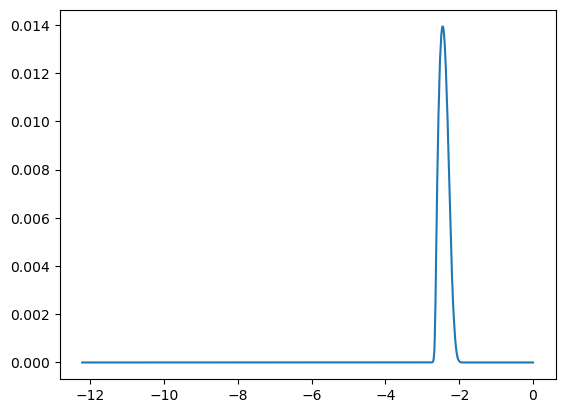

In [18]:
plt.plot(h.logxq,h.ni56)

In [15]:
nickel=-np.gradient(h.mass,len(h.zone))*h.ni56
print(nickel.sum()*0.64)

1.0816743838922465e-08


In [5]:
file_pattern = os.path.join(directory_path, 'profile*.data')
data_files = glob.glob(file_pattern)
print(data_files)

['/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile1.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile2.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile3.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile4.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile5.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile6.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile7.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile8.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile9.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile10.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile11.data', '/userdata/data/bhat/D6/KavliSP23/Test_Ni/Long_Evolve/LOGS_burning/profile12.data', 

In [6]:
# Create a slider for file selection
file_slider = widgets.IntSlider(min=0, max=len(data_files)-1, step=1, description='File Index')
# Create an Output widget for the plot
plot_output = widgets.Output()

In [13]:
# Create a function to update the plot based on the file index
def update_plot(file_index):
    file = data_files[file_index]
    data = MesaData(file)

    with plot_output:
        clear_output(wait=True)
        figs, axs=plt.subplots(4,1,figsize=(4,10))
        axs[0].plot(10**data.logR[1:],np.log10(data.xq[1:]))
        axs[0].set_ylabel('Mass')
        axs[1].plot(data.xq, data.ni56)
        axs[1].set_ylabel('log10(ni56)')
        #axs[1].set_title('Composition')
        axs[2].plot(data.zone, data.luminosity)
        axs[2].set_ylabel('log10(S)')
        axs[3].plot(data.zone, np.log10(data.T))
        axs[3].set_ylabel('Luminosity')
        plt.xlabel('Radius')
        #plt.title(f'Mass and composition vs. Radius for File: {os.path.basename(file)}')
        plt.show()

In [14]:
file_slider_output = widgets.interactive_output(update_plot, {'file_index': file_slider})


In [12]:
display(widgets.HBox([plot_output, file_slider]))


# History


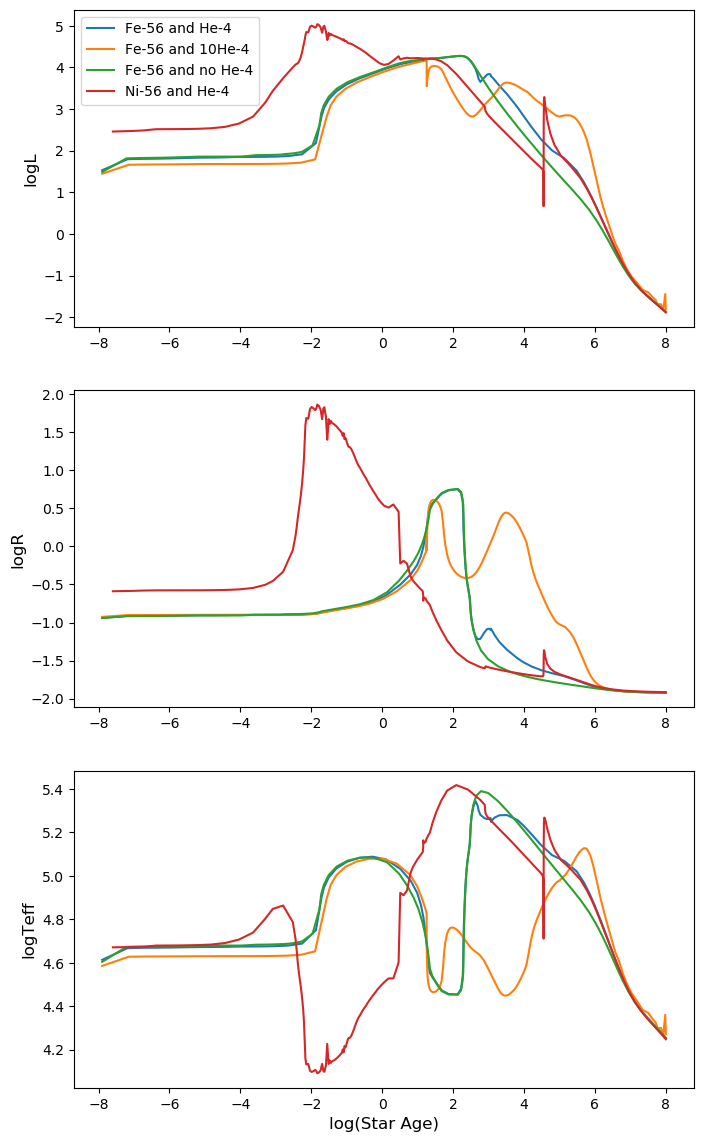

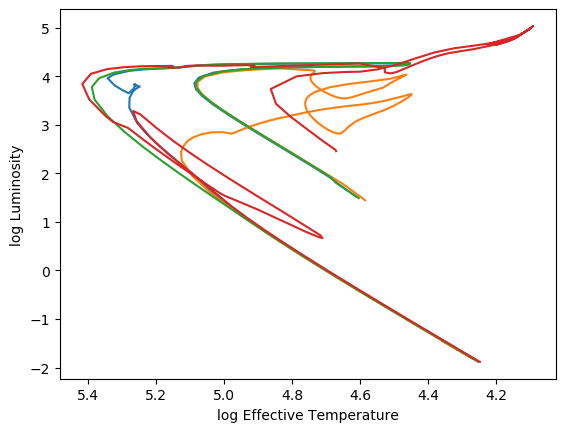

In [3]:
h = MesaData(os.path.join(directory_path, 'history.data'))
h2 = MesaData(os.path.join(directory_path2, 'history.data'))
h3 = MesaData(os.path.join(directory_path3, 'history.data'))
h4 = MesaData(os.path.join(directory_path4, 'history.data'))

figs, axs=plt.subplots(3,1,figsize=(8,14))
axs[0].plot(np.log10(h.star_age), h.log_L)
axs[0].plot(np.log10(h2.star_age), h2.log_L)
axs[0].plot(np.log10(h3.star_age), h3.log_L)
axs[0].plot(np.log10(h4.star_age), h4.log_L)

axs[0].set_ylabel("logL",fontsize=12)
axs[0].legend(('Fe-56 and He-4','Fe-56 and 10He-4','Fe-56 and no He-4','Ni-56 and He-4'))
axs[1].plot(np.log10(h.star_age), h.log_R)
axs[1].plot(np.log10(h2.star_age), h2.log_R)
axs[1].plot(np.log10(h3.star_age), h3.log_R)
axs[1].plot(np.log10(h4.star_age), h4.log_R)

axs[1].set_ylabel("logR",fontsize=12)
axs[2].plot(np.log10(h.star_age), h.log_Teff)
axs[2].plot(np.log10(h2.star_age), h2.log_Teff)
axs[2].plot(np.log10(h3.star_age), h3.log_Teff)
axs[2].plot(np.log10(h4.star_age), h4.log_Teff)

axs[2].set_ylabel("logTeff",fontsize=12)

# set axis labels
plt.xlabel('log(Star Age)',fontsize=12)
plt.show()

plt.plot(h.log_Teff, h.log_L)
plt.plot(h2.log_Teff, h2.log_L)
plt.plot(h3.log_Teff, h3.log_L)
plt.plot(h4.log_Teff, h4.log_L)


plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')

# invert the x-axis
plt.gca().invert_xaxis()
#plt.scatter(4.322,-4.408)
#plt.scatter(4.903,-4.334)
#plt.scatter(5.113,-4.4508)
#plt.scatter(4.845,-5.264)
#plt.ylim(-6,6)
#plt.savefig("Plots_burning/HR_1d8.pdf")
#plt.savefig("Plots_burning/HR_1d8.png")

# Composition

In [ ]:
h2 = np.genfromtxt('/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/composition.dat',skip_header=1)
h = MesaData(os.path.join(directory_path, 'profile11.data'))
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
plt.plot(h2[:,0],np.log10(h2[:,3]))
plt.plot(h2[:,0],np.log10(h2[:,4]))
plt.plot(h2[:,0],np.log10(h2[:,5]))
plt.plot(h2[:,0],np.log10(h2[:,6]))
plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'$X_q$')
plt.ylabel(r'$X_n$')